# Simulation of SDE

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Take Black-Scholes model as an example $dS_t = S_t(r\,dt+\sigma\,dW_t)$ with closed-form solution $S_t = S_0\cdot e^{\left(r - \frac{\sigma^2}{2}\right)t + \sigma W_t}$ and let's take $S_0=1$. Simulate till time $T=1$ with step size $h$.

In [2]:
S0 = 1.0
T = 1.0
# Parameter in BS model
r = 0.1
sigma = 0.1

# True solution
def true_sol(r,sigma,S0,t,Wt):
    return S0 * np.exp((r - (sigma**2 / 2)) * t + sigma * Wt)

## Euler-Maruyama

$\hat{S}_{t_{n+1}} = \hat{S}_{t_n}(1 + rh + \sigma \xi_{n+1})$ where $\xi_{n+1} = W_{t_n+h} - W_{t_n}\sim N(0,h)$ and $\xi_1,\xi_2,...$ are $i.i.d.$.

Text(0.5, 1.0, 'Brownian Motion Trajectory')

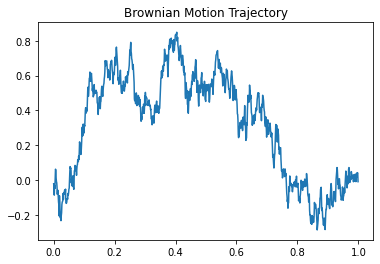

In [4]:
# Fix h, fix a BM path
h = 0.001
N = int(T / h)
BM_increment = np.sqrt(h) * np.random.randn(N)
BM_path = np.cumsum(BM_increment) # Start from time h, not 0

plot_time = np.array(range(N)) * h
plt.plot(plot_time,BM_path)
plt.title("Brownian Motion Trajectory")

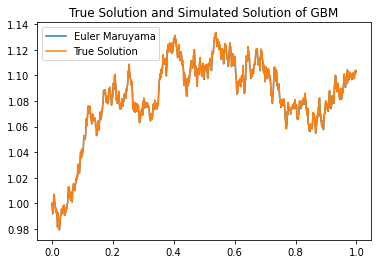

In [11]:
# EM method
EM_approx = np.zeros(N)
EM_approx[0] = S0
for i in range(N - 1):
    EM_approx[i + 1] = EM_approx[i] * (1 + r * h + sigma * BM_increment[i])

# True solution
True_sol = np.zeros(N)
True_sol[0] = S0
for i in range(1,N):
    True_sol[i] = true_sol(r,sigma,S0,i * h,BM_path[i - 1])

# Plot two trajectories
plt.plot(plot_time,EM_approx)
plt.plot(plot_time,True_sol)
plt.title("True Solution and Simulated Solution of GBM")
plt.legend(["Euler Maruyama","True Solution"])

Text(0, 0.5, 'Absolute Error')

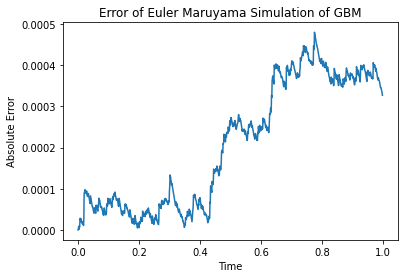

In [12]:
# Plot the error 
plt.plot(plot_time,np.abs(EM_approx - True_sol))
plt.title("Error of Euler Maruyama Simulation of GBM")
plt.xlabel("Time")
plt.ylabel("Absolute Error")

## Error Bound 

Euler-Maruyama shall have strong error bound $\mathbb{E}\sup_{0\leq n\leq N}\left|S_{t_n} - \hat{S}_{t_n}\right| = O\left(\sqrt{h}\right)$ when $h\to 0$.

In [13]:
# Set up some options of h close to 0
h_option = np.exp(np.linspace(-10,-2,40))

# Use Monte Carlo to approximate the expectation for each fixed h
# Number of iterations in Monte Carlo
ITER_NUM = 50

# Record strong error
strong_error_rec = np.zeros(len(h_option))

In [14]:
# Fix h
for count, h in enumerate(h_option):
    
    # Number of time steps
    N = int(T / h)
    
    # Cumulated maximum error
    sum_max_diff = 0
    
    # Monte Carlo
    for _ in range(ITER_NUM):
        
        # Fix a BM path
        BM_increment = np.sqrt(h) * np.random.randn(N)
        BM_path = np.cumsum(BM_increment) # Start from time h, not 0
        
        # EM method
        EM_approx = np.zeros(N)
        EM_approx[0] = S0
        for i in range(N - 1):
            EM_approx[i + 1] = EM_approx[i] * (1 + r * h + sigma * BM_increment[i])

        # True solution
        True_sol = np.zeros(N)
        True_sol[0] = S0
        for i in range(1,N):
            True_sol[i] = true_sol(r,sigma,S0,i * h,BM_path[i - 1])
        
        # Difference at each time between simulation result and the true solution
        diff = EM_approx - True_sol
        abs_diff = np.abs(diff)
        
        # Take the maximum element in diff
        max_diff = np.max(abs_diff)
        sum_max_diff = sum_max_diff + max_diff
    
    # Average maximum difference
    avg_max_diff = sum_max_diff / ITER_NUM
    
    # The average maximum difference is the strong error
    strong_error_rec[count] = avg_max_diff

Text(0, 0.5, '$\\log (Error)$')

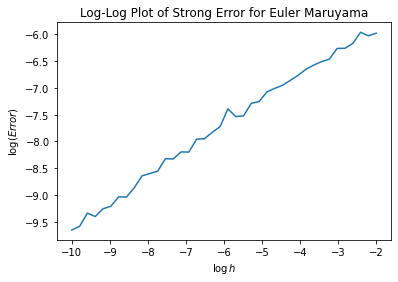

In [15]:
# Plot the strong error curve, make log-log plot
plt.plot(np.log(h_option),np.log(strong_error_rec))
plt.title("Log-Log Plot of Strong Error for Euler Maruyama")
plt.xlabel("$\log h$")
plt.ylabel("$\log (Error)$")

As we can see, the log-log plot is approximately a line with slope $\frac{1}{2}$, consistent with the theoretical bound.

## Milstein

$\hat{S}_{t_{n+1}} = \hat{S}_{t_n}(1 + rh + \sigma \xi_{n+1}) + \frac{\sigma^2}{2}\hat{S}_{t_n}(\xi^2_{n+1} - h)$ where $\xi_{n+1} = W_{t_n+h} - W_{t_n}\sim N(0,h)$ and $\xi_1,\xi_2,...$ are $i.i.d.$.

## Error Bound

Milstein shall have strong error bound $\mathbb{E}\sup_{0\leq n\leq N}\left|S_{t_n} - \hat{S}_{t_n}\right| = O\left(h\right)$ when $h\to 0$.

In [295]:
# Fix h
for count, h in enumerate(h_option):
    
    # Number of time steps
    N = int(T / h)
    
    # Cumulated maximum error
    sum_max_diff = 0
    
    # Monte Carlo
    for _ in range(ITER_NUM):
        
        # Fix a BM path
        BM_increment = np.sqrt(h) * np.random.randn(N)
        BM_path = np.cumsum(BM_increment) # Start from time h, not 0
        
        # Milstein method
        MST_approx = np.zeros(N)
        MST_approx[0] = S0
        for i in range(N - 1):
            MST_approx[i + 1] = MST_approx[i] * (1 + r * h + sigma * BM_increment[i] 
                                               + (sigma ** 2/2) * (BM_increment[i] ** 2 - h))

        # True solution
        True_sol = np.zeros(N)
        True_sol[0] = S0
        for i in range(1,N):
            True_sol[i] = true_sol(r,sigma,S0,i * h,BM_path[i - 1])
        
        # Difference at each time between simulation result and the true solution
        diff = MST_approx - True_sol
        abs_diff = np.abs(diff)
        
        # Take the maximum element in diff
        max_diff = np.max(abs_diff)
        sum_max_diff = sum_max_diff + max_diff
    
    # Average maximum difference
    avg_max_diff = sum_max_diff / ITER_NUM
    
    # The average maximum difference is the strong error
    strong_error_rec[count] = avg_max_diff

Text(0, 0.5, '$\\log (Error)$')

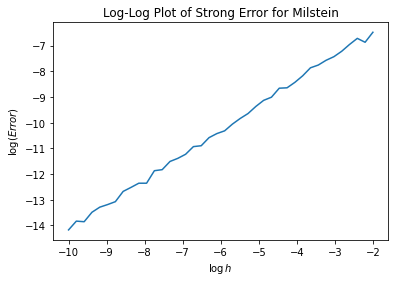

In [296]:
# Plot the strong error curve, make log-log plot
plt.plot(np.log(h_option),np.log(strong_error_rec))
plt.title("Log-Log Plot of Strong Error for Milstein")
plt.xlabel("$\log h$")
plt.ylabel("$\log (Error)$")

As we can see, the log-log plot is approximately a line with slope $1$, consistent with the theoretical bound.

## Case where Euler-Maruyama Fails

Consider the SDE $dX_t = -X_t^3\,dt + \sigma\,dW_t$ with some initial condition.
This is a mean-reverting SDE with two phases; when $X_t$ is far away from 0 the drift coefficient is of much larger order in the opposite direction, resulting in large oscillation of the trajectory, when $X_t$ is near 0, $X_t^3$ is of much less order, resulting in $X_t$ living near 0.
However, the existence of random noise may make the trajectory transit between two phases, thus providing unstable simulation results. (The failure of method actually depends on the relationship between $h$ and the initial condition $X_0 = x_0$, refer to the notes for more details)

In [297]:
X0 = 8.0
sigma = 4.0
T = 1.0

# Parameter for simulation
h = 0.03
N = int(T / h)

The Euler Maruyama scheme is: $\hat{X}_{t_{n+1}} = \hat{X}_{t_n} - \hat{X}^3_{t_n}h + \sigma\xi_{n+1}$ where $\xi_{n+1} = W_{t_n+h} - W_{t_n}\sim N(0,h)$ and $\xi_1,\xi_2,...$ are $i.i.d.$.

/var/folders/sd/ntm8vytx57g033nh4jm4j2700000gn/T/ipykernel_74292/1220230460.py:17: RuntimeWarning: overflow encountered in double_scalars
  EM_approx[i + 1] = EM_approx[i] - (EM_approx[i] ** 3) * h + sigma * BM_increment[i]
/var/folders/sd/ntm8vytx57g033nh4jm4j2700000gn/T/ipykernel_74292/1220230460.py:17: RuntimeWarning: invalid value encountered in double_scalars
  EM_approx[i + 1] = EM_approx[i] - (EM_approx[i] ** 3) * h + sigma * BM_increment[i]


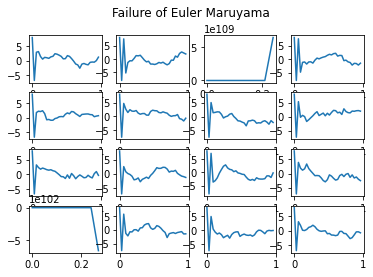

In [298]:
rownum = 4
colnum = 4
fig, axs = plt.subplots(rownum,colnum)

for row in range(rownum):
    for col in range(colnum):

        # Fix a BM path
        plot_time = np.array(range(N)) * h
        BM_increment = np.sqrt(h) * np.random.randn(N)
        BM_path = np.cumsum(BM_increment) # Start from time h, not 0

        # EM method
        EM_approx = np.zeros(N)
        EM_approx[0] = X0
        for i in range(N - 1):
            EM_approx[i + 1] = EM_approx[i] - (EM_approx[i] ** 3) * h + sigma * BM_increment[i]

        # Plot two trajectories
        axs[row,col].plot(plot_time,EM_approx)
        fig.suptitle("Failure of Euler Maruyama")

We see that under this set of subtly "designed" parameter, Euler Maruyama fails since repeated simulations give unstable results. 